In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [72]:
import os
print(os.getcwd())

d:\Documents\OISP\specialized_project\website-crawler-service\website_scraper\models


In [73]:
df = pd.read_csv('../mogi_after_parsing.csv')
df.head()

,title,description,property_type,transaction_type,price,province,district,ward,street,location_latitude,location_longitude,owner_name,owner_contact,area,bedrooms,bathrooms
0,Căn hộ mini 1 phòng ngủ riêng dành cho 2,✅ diện tích 30 - 45 m2 : + 1 phòng ngủ + 1...,room,rent,6.0,TPHCM,Tân Bình,13,62/5A Nhất Chi Mai,106.639917,10.805223,Vo Son,963621934,30,0,0
1,"Phòng mới, full nội thất, an ninh. Gần Sân Bay...","Cho thuê phòng MINI FULL tiện nghi, mới, cao c...",room,rent,3.5,TPHCM,Tân Bình,2,Yên Thế,106.667713,10.807054,Mo Gi,935534687,25,0,0
2,Cho thuê phòng trọ gần chợ Phạm Văn Hai,Cho thuê phòng diện tích từ 10m2 đến 30m2Giá t...,room,rent,3.0,TPHCM,Tân Bình,2,Tân Sơn Hòa,106.667713,10.807054,Mai Sang,937727923,20,0,0
3,Phòng căn hộ Studio đủ Nội Thất cao cấp 224 Lý...,Cho thuê phòng căn hộ cao cấp sang chảnh Đối d...,room,rent,5.6,TPHCM,10,14,Lý Thường Kiệt,106.661602,10.772981,Lê Huy Hoàng,937554570,35,0,0
4,Cho Thuê Phòng Q10.rộng rãi thoải mái.cửa sổ v...,🤗Cho thuê các phòng như hình hoặc Nguyên tầng ...,room,rent,2.7,TPHCM,10,4,Bà Hạt,106.670002,10.763026,Trieu Anh,838999988,22,0,0


# Data exploration

In [74]:
df.drop(['bedrooms', 'bathrooms', 'title', 'description', 'transaction_type', 'owner_name', 'owner_contact', 'property_type', 'street'], axis=1, inplace=True)
df.head()

,price,province,district,ward,location_latitude,location_longitude,area
0,6.0,TPHCM,Tân Bình,13,106.639917,10.805223,30
1,3.5,TPHCM,Tân Bình,2,106.667713,10.807054,25
2,3.0,TPHCM,Tân Bình,2,106.667713,10.807054,20
3,5.6,TPHCM,10,14,106.661602,10.772981,35
4,2.7,TPHCM,10,4,106.670002,10.763026,22


In [75]:
df.shape

(5970, 7)

In [76]:
df.keys()

Index(['price', 'province', 'district', 'ward', 'location_latitude',
       'location_longitude', 'area'],
      dtype='object')

In [101]:
df["province"]

,price,province,district,ward,location_latitude,location_longitude,area
0,6.0,1,21,4,106.639917,10.805223,30
1,3.5,1,21,10,106.667713,10.807054,25
2,3.0,1,21,10,106.667713,10.807054,20
3,5.6,1,1,5,106.661602,10.772981,35
4,2.7,1,1,19,106.670002,10.763026,22


In [77]:
set(df['district'].tolist())

{'1',
 '10',
 '11',
 '12',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'Bình Chánh',
 'Bình Thạnh',
 'Bình Tân',
 'Củ Chi',
 'Gò Vấp',
 'Hóc Môn',
 'Nhà Bè',
 'Phú Nhuận',
 'Thủ Đức',
 'Tân Bình',
 'Tân Phú'}

In [78]:
set(df['ward'].tolist())

{'1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '2',
 '21',
 '22',
 '24',
 '25',
 '26',
 '27',
 '28',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'An Khánh',
 'An Lạc',
 'An Lạc A',
 'An Phú',
 'An Phú Đông',
 'Bà Điểm',
 'Bình An',
 'Bình Chiểu',
 'Bình Hưng',
 'Bình Hưng Hòa',
 'Bình Hưng Hòa A',
 'Bình Hưng Hòa B',
 'Bình Thuận',
 'Bình Thọ',
 'Bình Trưng Tây',
 'Bình Trưng Đông',
 'Bình Trị Đông',
 'Bình Trị Đông A',
 'Bình Trị Đông B',
 'Bến Nghé',
 'Bến Thành',
 'Cát Lái',
 'Cô Giang',
 'Cầu Kho',
 'Cầu Ông Lãnh',
 'Hiệp Bình Chánh',
 'Hiệp Bình Phước',
 'Hiệp Phú',
 'Hiệp Thành',
 'Hiệp Tân',
 'Hòa Thạnh',
 'Hưng Long',
 'Linh Chiểu',
 'Linh Trung',
 'Linh Tây',
 'Linh Xuân',
 'Linh Đông',
 'Long Bình',
 'Long Phước',
 'Long Thạnh Mỹ',
 'Long Trường',
 'Nguyễn Cư Trinh',
 'Nguyễn Thái Bình',
 'Phú Hòa Đông',
 'Phú Hữu',
 'Phú Mỹ',
 'Phú Thuận',
 'Phú Thạnh',
 'Phú Thọ Hòa',
 'Phú Trung',
 'Phú Xuân',
 'Phước Bình',
 'Phước Kiển',
 'Phước Long A',
 'Phước Lon

In [79]:
df_quan_2 = df[df['district'] == 'Quận 2']
df_quan_2.head()

,price,province,district,ward,location_latitude,location_longitude,area


In [80]:
# Check Nan values in df and remove it
df.isnull().sum()
df.dropna(inplace=True)


# Data visualization

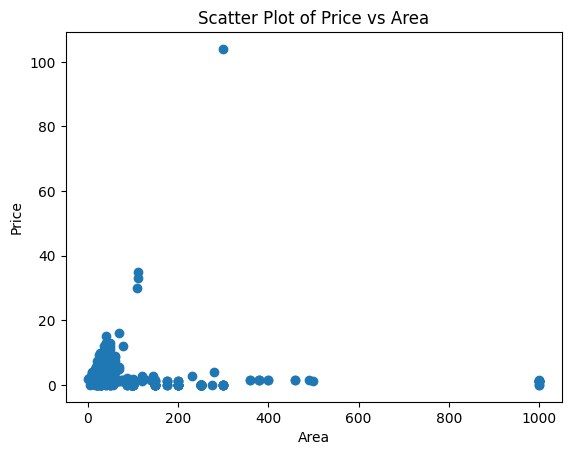

In [81]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.show()


# Data processing

In [82]:
# Change "quận 2" and "Quận 2 (Tp Thủ Đức)" to "Quận 2"
df['district'] = df['district'].replace('Quận 2 (Tp Thủ Đức)', 'Quận 2')

In [83]:
# Change province, ward, street from categorical to numerical value
from sklearn.preprocessing import LabelEncoder

le_district = LabelEncoder()
le_province = LabelEncoder()
le_ward = LabelEncoder()

df["district"] = le_district.fit_transform(df['district'])
df["province"] = le_province.fit_transform(df['province'])
df["ward"] = le_ward.fit_transform(df['ward'])
df.head()

,price,province,district,ward,location_latitude,location_longitude,area
0,6.0,1,21,4,106.639917,10.805223,30
1,3.5,1,21,10,106.667713,10.807054,25
2,3.0,1,21,10,106.667713,10.807054,20
3,5.6,1,1,5,106.661602,10.772981,35
4,2.7,1,1,19,106.670002,10.763026,22


In [84]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [85]:
re_model = RandomForestRegressor(n_estimators=100, random_state=42)
re_model.fit(X_train, y_train)
y_pred = re_model.predict(X_test)
y_pred

array([2.93617614, 0.0755    , 3.88948095, 4.04161847, 2.34699014,
       4.13052737, 4.71663517, 6.04616746, 3.40459047, 3.78103447,
       3.98882621, 3.29780712, 4.45116165, 4.56319992, 2.93617614,
       3.37609941, 2.93617614, 2.84056089, 3.70988783, 3.88410087,
       1.84323819, 3.98421464, 3.3607069 , 2.14323133, 4.99433333,
       3.82794041, 3.46370162, 3.4214451 , 3.36789376, 2.95534405,
       3.63145233, 3.88276031, 4.13052737, 3.68857434, 5.32933333,
       2.32813667, 4.03670062, 2.89760548, 3.67934397, 3.64642695,
       2.99191515, 2.40762841, 3.45698819, 2.78437463, 4.88165428,
       4.04896596, 3.28787262, 3.09630617, 2.89278211, 4.515115  ,
       2.44536667, 3.03636571, 4.60009968, 6.30824549, 2.849275  ,
       2.8087393 , 3.64064433, 3.29780712, 4.61686111, 3.40459047,
       3.3974119 , 3.88478022, 3.88276031, 3.82233587, 3.99122725,
       3.60323819, 0.        , 3.39206852, 3.51244366, 2.83228277,
       4.00306131, 3.37314762, 3.86291277, 4.80042615, 8.11431

# Evaluation

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Predict the target variable
y_pred = re_model.predict(X_test)

print('---Random Forest Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


---Random Forest Regressor---
Mean Absolute Error (MAE): 0.7647245053937397
Mean Squared Error (MSE): 1.39186938113874
R-squared: 0.4128343571552979
Root Mean Squared Error (RMSE): 1.1797751400748957


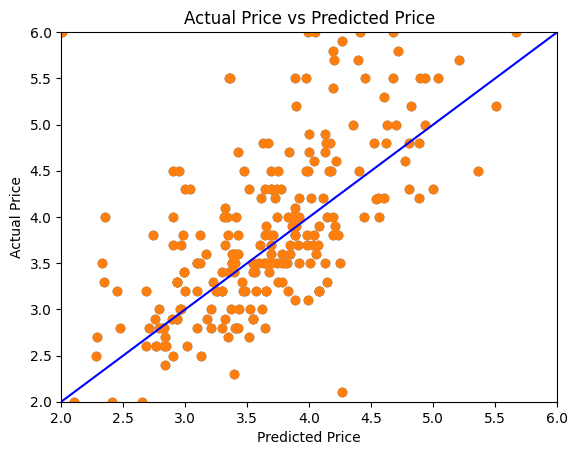

In [87]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt



plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim(2, 6)
plt.ylim(2, 6)
plt.show()

In [88]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
3751,1.700,2.936176
810,0.000,0.075500
1600,3.900,3.889481
5729,3.799,4.041618
4684,3.300,2.346990
1496,4.700,4.130527
1047,5.800,4.716635
4394,5.000,6.046167
79,3.600,3.404590
5141,3.300,3.781034


# Conclusion
For now, the property_type are all "TPHCM or Thu Duc", so I buit the DT based on the districts and the ward and the area to predict the price based on these features. I will try to improve the pipeline to get  more feature when crawling others rentals website.

In [89]:
# Choose n_neighbors
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)

{'n_neighbors': 34}


In [90]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [91]:
# # KNN Regressor
# knn_model = KNeighborsRegressor(n_neighbors=knn_cv.best_params_['n_neighbors'])
# knn_model.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
y_pred

array([3.02047059, 0.37941176, 3.47352941, 4.16761765, 3.21167647,
       4.27058824, 4.03529412, 6.03088235, 3.46173529, 3.79664706,
       4.61176471, 3.35588235, 5.09235294, 4.51732353, 3.02047059,
       3.28520588, 3.02047059, 3.13008824, 3.42352941, 4.09411765,
       2.64705882, 3.84702941, 3.16461765, 2.94258824, 5.03379412,
       3.76173529, 3.047     , 3.8       , 3.141     , 3.6085    ,
       3.33520588, 4.36176471, 4.27058824, 3.8       , 0.50294118,
       3.16755882, 4.05294118, 3.00876471, 4.07644118, 3.59702941,
       3.43823529, 3.87644118, 3.635     , 2.93814706, 4.89705882,
       4.06173529, 3.9235    , 3.12644118, 3.02638235, 3.725     ,
       3.42058824, 3.33529412, 4.19276471, 5.57644118, 3.37794118,
       3.32938235, 3.69994118, 3.35588235, 5.46029412, 3.46173529,
       3.24111765, 3.91752941, 4.36176471, 3.744     , 3.94111765,
       3.49994118, 0.        , 3.50879412, 3.57644118, 2.92047059,
       3.12052941, 3.23232353, 3.88820588, 3.99997059, 4.12941

In [92]:
X_test.head()

,province,district,ward,location_latitude,location_longitude,area
3751,1,22,114,106.621773,10.814095,25
810,1,19,8,106.685476,10.792816,150
1600,1,9,95,106.697735,10.744262,20
5729,1,16,21,106.682907,10.842569,35
4684,1,21,1,106.646320,10.781394,20


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('---KNN Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

---KNN Regressor---
Mean Absolute Error (MAE): 0.8111280739720637
Mean Squared Error (MSE): 1.3892059642695953
R-squared: 0.4139579301710756
Root Mean Squared Error (RMSE): 1.1786458179918153


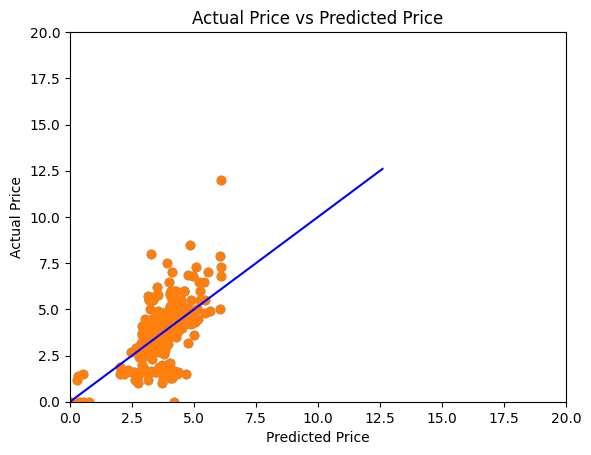

In [94]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

In [95]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
3751,1.700,3.020471
810,0.000,0.379412
1600,3.900,3.473529
5729,3.799,4.167618
4684,3.300,3.211676
1496,4.700,4.270588
1047,5.800,4.035294
4394,5.000,6.030882
79,3.600,3.461735
5141,3.300,3.796647


In [96]:
# use SVM to predict the price
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}
svr = SVR()

svr_cv = GridSearchCV(svr, param_grid, cv=3, n_jobs=-1)
svr_cv.fit(X_train, y_train)

print(svr_cv.best_params_)
y_pred = svr_cv.predict(X_test)
y_pred


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


array([ 3.10053956,  1.62045472,  4.05787679,  3.90002855,  3.47611815,
        4.40020835,  3.9704503 ,  6.54134128,  3.40021867,  3.77602952,
        3.78891501,  3.40473296,  5.34391647,  3.34666211,  3.10053956,
        3.46693324,  3.10053956,  2.90169259,  3.46758421,  3.58406669,
        2.49969927,  3.89984854,  2.71988615,  1.13219537,  5.46635795,
        3.59979525,  3.58412851,  3.80003464,  2.93869778,  3.23936121,
        3.47640202,  3.9000776 ,  4.40020835,  3.70001863,  1.00773943,
        3.01250992,  4.3000157 ,  3.20041195,  4.03383929,  3.460659  ,
        2.61901287,  0.92872648,  3.57003075,  2.89864576,  5.0345583 ,
        4.5997367 ,  2.87960329,  3.30022402,  2.93014572,  3.8300871 ,
        3.4743812 ,  2.63049438,  4.37721739,  6.70027332,  3.57574942,
        3.2532743 ,  3.59991614,  3.40473296,  5.01890005,  3.40021867,
        3.30023451,  3.79533359,  3.9000776 ,  3.59890897,  3.76377214,
        3.40021076,  0.09976048,  3.69799118,  3.53832511,  2.76

In [97]:
print('---SVM Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

---SVM Regressor---
Mean Absolute Error (MAE): 0.7603573004808197
Mean Squared Error (MSE): 1.4413218253592397
R-squared: 0.39197264657063413
Root Mean Squared Error (RMSE): 1.200550634233825


In [98]:
# Save the models into pickle file
import pickle

with open('re_model.pkl', 'wb') as f:
		pickle.dump(re_model, f)

encoders = {
	'le_district': le_district,
	'le_province': le_province,
	'le_ward': le_ward
}
with open('label_encoder.pkl', 'wb') as f:
		pickle.dump(encoders, f)